In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = h5py.File('mnist_traindata.hdf5', 'r')
list(data.keys())

xdata = np.asarray(data['xdata'])
ydata = np.asarray(data['ydata'])

train_data = int((5/6)*xdata.shape[0])
x_train = xdata[:train_data]
y_train = ydata[:train_data]

x_valid = xdata[train_data:]
y_valid = ydata[train_data:]

test = h5py.File('mnist_testdata.hdf5', 'r')
x_test = np.asarray(test['xdata'])
y_test = np.asarray(test['ydata'])

In [22]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(z):
    zmax = np.max(z, axis=1, keepdims=True)
    exp = np.exp(z - zmax)
    return exp / np.sum(exp, axis=1, keepdims=True)

def cross_entropy_loss(y, y_hat):
    return -np.mean(y*np.log(y_hat + 1e-10))

def tanH_train(x_train, y_train, learning_rate):
    epochs = 50
    minibatch_size = 100
    train_acc_list = []
    valid_acc_list = []

    np.random.seed(1)
    w1 = np.random.normal(0, 1/np.sqrt(784), (784, 512))
    b1 = np.zeros((1, 512))
    w2 = np.random.normal(0, 1/np.sqrt(512), (512, 512))
    b2 = np.zeros((1, 512))
    w3 = np.random.normal(0, 1/np.sqrt(512), (512, 10))
    b3 = np.zeros((1, 10))

    for epoch in range(epochs):
        indices = np.random.permutation(len(x_train))
        x_train = x_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(x_train), minibatch_size):
            x = x_train[i:i+minibatch_size]
            y = y_train[i:i+minibatch_size]

            if ((epoch+1)%20==0):
                learning_rate = learning_rate/2

            # Forward pass
            z1 = x @ w1 + b1
            a1 = tanh(z1)
            z2 = a1 @ w2 + b2
            a2 = tanh(z2)
            z3 = a2 @ w3 + b3
            y_hat = softmax(z3)

            # Backward pass
            grad_z3 = y_hat - y
            grad_w3 = a2.T @ grad_z3
            grad_b3 = np.sum(grad_z3, axis=0, keepdims=True)
            grad_a2 = grad_z3 @ w3.T
            grad_z2 = grad_a2 * tanh_derivative(z2)
            grad_w2 = a1.T @ grad_z2
            grad_b2 = np.sum(grad_z2, axis=0, keepdims=True)
            grad_a1 = grad_z2 @ w2.T
            grad_z1 = grad_a1 * tanh_derivative(z1)
            grad_w1 = x.T @ grad_z1
            grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

            # Update weights and biases
            w3 -= learning_rate * grad_w3 * (1/minibatch_size)
            b3 -= learning_rate * grad_b3 * (1/minibatch_size)
            w2 -= learning_rate * grad_w2 * (1/minibatch_size)
            b2 -= learning_rate * grad_b2 * (1/minibatch_size)
            w1 -= learning_rate * grad_w1 * (1/minibatch_size)
            b1 -= learning_rate * grad_b1 * (1/minibatch_size)

        # Compute training and validation accuracy
        train_z1 = x_train @ w1 + b1
        train_a1 = tanh(train_z1)
        train_z2 = train_a1 @ w2 + b2
        train_a2 = tanh(train_z2)
        train_z3 = train_a2 @ w3 + b3
        train_y_hat = softmax(train_z3)
        train_acc = np.mean(np.argmax(train_y_hat, axis=1) == np.argmax(y_train, axis=1))

        valid_z1 = x_valid @ w1 + b1
        valid_a1 = tanh(valid_z1)
        valid_z2 = valid_a1 @ w2 + b2
        valid_a2 = tanh(valid_z2)
        valid_z3 = valid_a2 @ w3 + b3
        valid_y_hat = softmax(valid_z3)
        valid_acc = np.mean(np.argmax(valid_y_hat, axis=1) == np.argmax(y_valid, axis=1))

        train_acc_list.append(train_acc*100)
        valid_acc_list.append(valid_acc*100)
    plt.plot(train_acc_list, label='Training Accuracy')
    plt.plot(valid_acc_list, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list

def relu_train(x_train, y_train, learning_rate):
    epochs = 50
    minibatch_size = 100
    train_acc_list = []
    valid_acc_list = []

    np.random.seed(1)
    w1 = np.random.normal(0, 1/np.sqrt(784), (784, 512))
    b1 = np.zeros((1, 512))
    w2 = np.random.normal(0, 1/np.sqrt(512), (512, 512))
    b2 = np.zeros((1, 512))
    w3 = np.random.normal(0, 1/np.sqrt(512), (512, 10))
    b3 = np.zeros((1, 10))

    for epoch in range(epochs):
        indices = np.random.permutation(len(x_train))
        x_train = x_train[indices]
        y_train = y_train[indices]

        for i in range(0, len(x_train), minibatch_size):
            x = x_train[i:i+minibatch_size]
            y = y_train[i:i+minibatch_size]

            if ((epoch+1)%20==0):
                learning_rate = learning_rate/2

            # Forward pass
            z1 = x @ w1 + b1
            a1 = relu(z1)
            z2 = a1 @ w2 + b2
            a2 = relu(z2)
            z3 = a2 @ w3 + b3
            y_hat = softmax(z3)

            # Backward pass
            grad_z3 = y_hat - y
            grad_w3 = a2.T @ grad_z3
            grad_b3 = np.sum(grad_z3, axis=0, keepdims=True)
            grad_a2 = grad_z3 @ w3.T
            grad_z2 = grad_a2 * relu_derivative(z2)
            grad_w2 = a1.T @ grad_z2
            grad_b2 = np.sum(grad_z2, axis=0, keepdims=True)
            grad_a1 = grad_z2 @ w2.T
            grad_z1 = grad_a1 * relu_derivative(z1)
            grad_w1 = x.T @ grad_z1
            grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

            # Update weights and biases
            w3 -= learning_rate * grad_w3 * (1/minibatch_size)
            b3 -= learning_rate * grad_b3 * (1/minibatch_size)
            w2 -= learning_rate * grad_w2 * (1/minibatch_size)
            b2 -= learning_rate * grad_b2 * (1/minibatch_size)
            w1 -= learning_rate * grad_w1 * (1/minibatch_size)
            b1 -= learning_rate * grad_b1 * (1/minibatch_size)

        # Compute training and validation accuracy
        train_z1 = x_train @ w1 + b1
        train_a1 = relu(train_z1)
        train_z2 = train_a1 @ w2 + b2
        train_a2 = relu(train_z2)
        train_z3 = train_a2 @ w3 + b3
        train_y_hat = softmax(train_z3)
        train_acc = np.mean(np.argmax(train_y_hat, axis=1) == np.argmax(y_train, axis=1))

        valid_z1 = x_valid @ w1 + b1
        valid_a1 = relu(valid_z1)
        valid_z2 = valid_a1 @ w2 + b2
        valid_a2 = relu(valid_z2)
        valid_z3 = valid_a2 @ w3 + b3
        valid_y_hat = softmax(valid_z3)
        valid_acc = np.mean(np.argmax(valid_y_hat, axis=1) == np.argmax(y_valid, axis=1))

        train_acc_list.append(train_acc*100)
        valid_acc_list.append(valid_acc*100)
    plt.plot(train_acc_list, label='Training Accuracy')
    plt.plot(valid_acc_list, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list

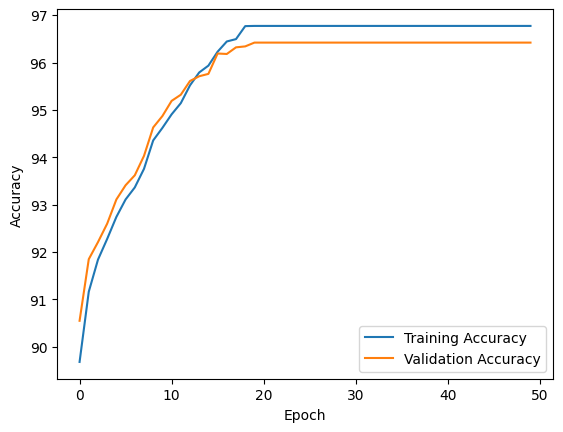

For Learning parameter 0.03 and Activation function TanH, the accuracy of training data is 96.772 '%'and Validation data is 96.41999999999999 %


In [23]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = tanH_train(x_train, y_train, 0.03)
print("For Learning parameter 0.03 and Activation function TanH, the accuracy of training data is", train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

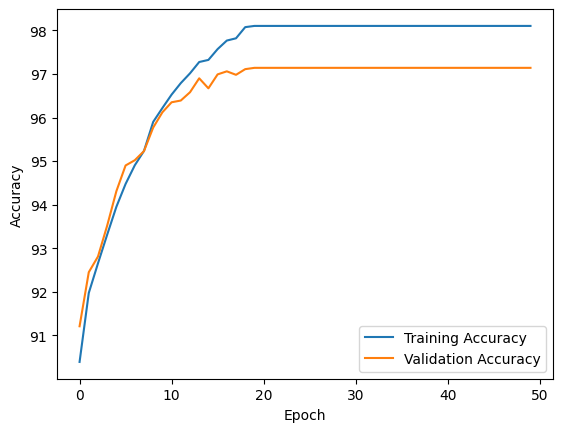

For Learning parameter 0.05 and Activation function TanH, the accuracy of training data is 98.102 '%'and Validation data is 97.14 %


In [24]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = tanH_train(x_train, y_train, 0.05)
print("For Learning parameter 0.05 and Activation function TanH, the accuracy of training data is", train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

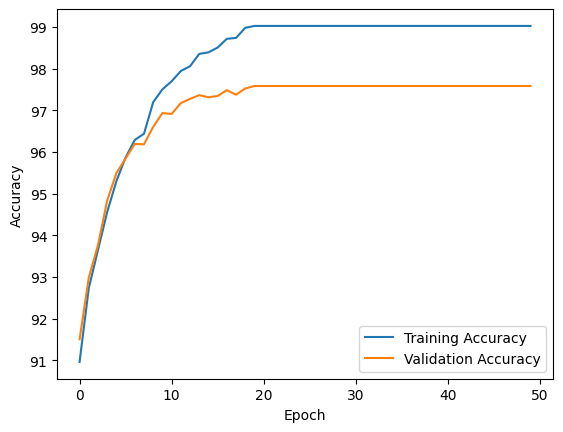

For Learning parameter 0.08 and Activation function TanH, the accuracy of training data is 99.022 '%'and Validation data is 97.58 %


In [25]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = tanH_train(x_train, y_train, 0.08)
print("For Learning parameter 0.08 and Activation function TanH, the accuracy of training data is",train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

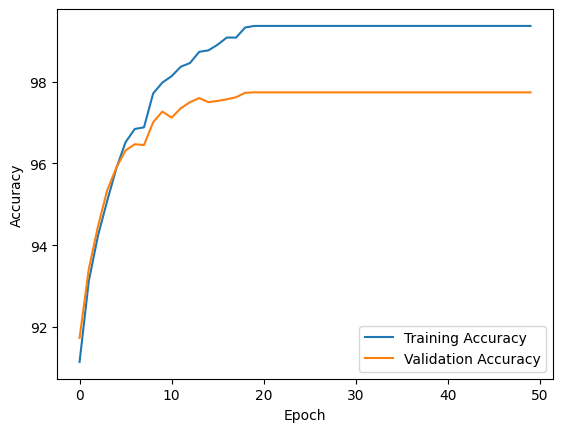

For Learning parameter 0.1 and Activation function TanH, the accuracy of training data is 99.366 '%'and Validation data is 97.74000000000001 %


In [26]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = tanH_train(x_train, y_train, 0.1)
print("For Learning parameter 0.1 and Activation function TanH, the accuracy of training data is",train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

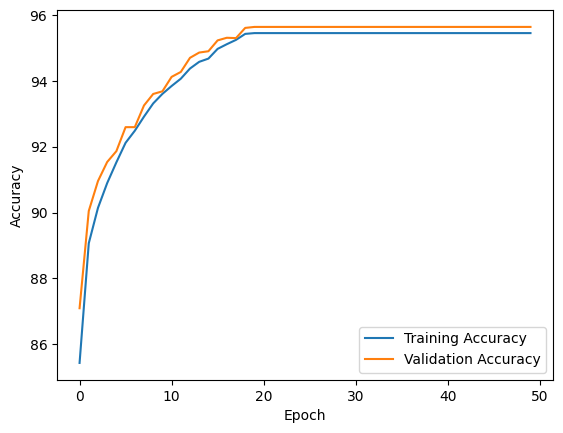

For Learning parameter 0.01 and Activation function ReLU, the accuracy of training data is 95.462 '%'and Validation data is 95.65 %


In [27]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = relu_train(x_train, y_train, 0.01)
print("For Learning parameter 0.01 and Activation function ReLU, the accuracy of training data is",train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

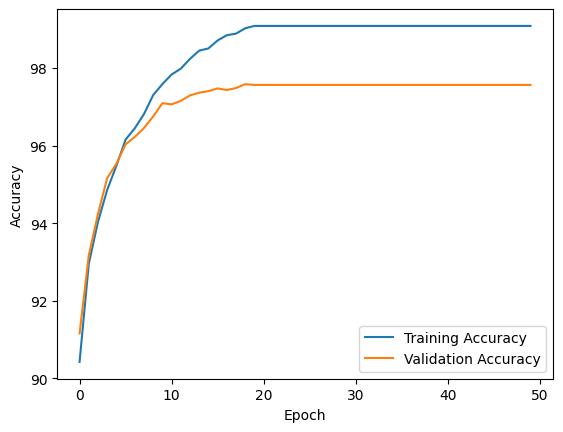

For Learning parameter 0.04 and Activation function ReLU, the accuracy of training data is 99.08 '%'and Validation data is 97.56 %


In [28]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = relu_train(x_train, y_train, 0.04)
print("For Learning parameter 0.04 and Activation function ReLU, the accuracy of training data is", train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

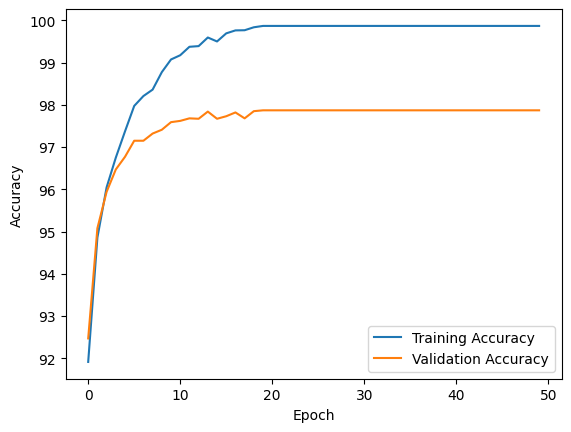

For Learning parameter 0.08 and Activation function ReLU, the accuracy of training data is 99.868 '%'and Validation data is 97.87 %


In [29]:
w1, w2, w3, b1, b2, b3, train_acc_list, valid_acc_list = relu_train(x_train, y_train, 0.08)
print("For Learning parameter 0.08 and Activation function ReLU, the accuracy of training data is", train_acc_list[-1],"'%'and Validation data is", valid_acc_list[-1],'%')

In [30]:
test_z1 = x_test @ w1 + b1
test_a1 = relu(test_z1)
test_z2 = test_a1 @ w2 + b2
test_a2 = relu(test_z2)
test_z3 = test_a2 @ w3 + b3
test_y_hat = softmax(test_z3)
test_acc = np.mean(np.argmax(test_y_hat, axis=1) == np.argmax(y_test, axis=1))

print("From the above experiments, the best validation accracy of 97.87"+"%"+" is obtained for Learning parameter 0.08 and Activation function ReLU and using these parameters for test data, ")

print("For Learning parameter 0.08 and Activation function ReLU, the accuracy of test data is " + str(test_acc*100) + "%")

From the above experiments, the best validation accracy of 97.87% is obtained for Learning parameter 0.08 and Activation function ReLU and using these parameters for test data, 
For Learning parameter 0.08 and Activation function ReLU, the accuracy of test data is 98.04%
